In [190]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [191]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [192]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [193]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [194]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [195]:
crypto_names=df_market_data.index.to_list()
print(crypto_names)

['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash', 'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv', 'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb', 'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token', 'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd', 'digibyte']


In [196]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns=df_market_data.columns.to_list()
print(columns)

market_data_scaled=StandardScaler().fit_transform(df_market_data[columns])
# print(market_data_scaled)

['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']


In [197]:
# Create a DataFrame with the scaled data
df_market_data_scaled=pd.DataFrame(market_data_scaled, columns=columns)
# df_market_data_scaled

# Copy the crypto names from the original data
crypto_names=df_market_data.index.to_list()
print(crypto_names)
df_market_data_scaled["coinid"] = df_market_data.index
# print (df_market_data_scaled["coinid"])

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coinid")

# Display sample data
df_market_data_scaled.head()

['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash', 'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv', 'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb', 'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token', 'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd', 'digibyte']


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [198]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))

In [199]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)


In [200]:
# Create a dictionary with the data to plot the Elbow curve
# 
# Note: Inertia is also known as WCSS (Within-Cluster Sum of Squares) - which is the sum of the squared distances
# from each data point to its closest centroid.  
# 
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow.head(10)

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [202]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_plot

:Curve   [k]   (inertia)

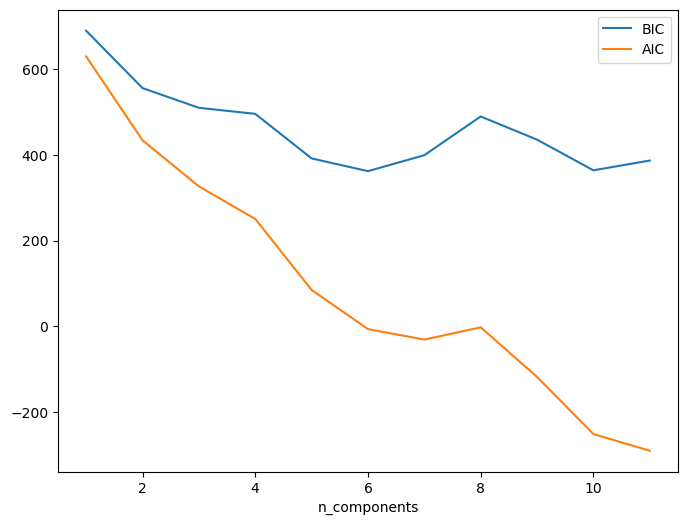

In [203]:
# Check using BIC and AIC (Bayesian Information Criterion and Akaike Information Criterion):
# 
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assumes need to find optimal clusters for all data
X = df_market_data_scaled.values

n_components = np.arange(1, 12)  
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.figure(figsize=(8, 6))
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


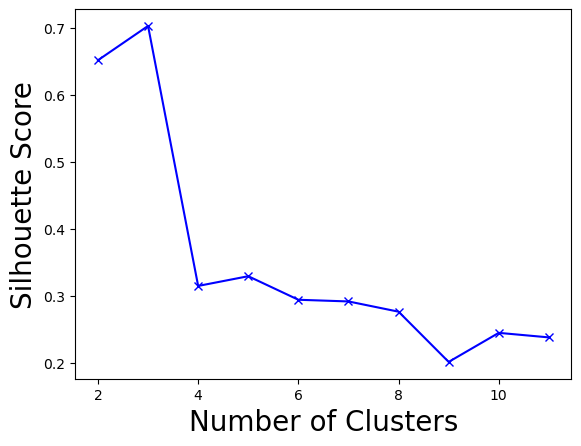

In [204]:
# Silhouette analysis:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters = n_cluster).fit(df_market_data_scaled.values)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_market_data_scaled.values, label, metric = 'euclidean')
    silhouette_scores.append(sil_coeff)
    
# Plotting silhouette scores
plt.plot(range(2, 12), silhouette_scores, 'bx-') 
plt.xlabel('Number of Clusters', fontsize = 20) 
plt.ylabel('Silhouette Score', fontsize = 20) 
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** When using the K-Means clustering elbow method, we see diminishing returns after adding the 4th cluster, so the best value for `k` appears to be "4".

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [205]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [206]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=1)

In [207]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(k_4)


[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [208]:
# Create a copy of the DataFrame
df_market_data_predictions = df_market_data_scaled.copy()


In [209]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions['cluster'] = k_4

# Display sample data
# df_market_data_predictions
df_market_data_predictions.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


In [210]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
predictions_plot = df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols="coinid"
)
predictions_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coinid)

---

### Optimize Clusters with Principal Component Analysis.

In [211]:
# Import the PCA module
from sklearn.decomposition import PCA

In [212]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [213]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_crypto = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
# Not a DataFrame, but an array.  I think they meant to print first 5 rows of data:
pca_crypto[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [214]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [215]:
print(sum(pca.explained_variance_ratio_))

0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of each component is 37.2%, 34.7% and 17.6% respectively, or 89.5% for all three principal components.  


In [216]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
df_pca_crypto = pd.DataFrame(
    pca_crypto,
    columns=["PCA1", "PCA2", "PCA3"]
)
# df_pca_crypto.head()

# Copy the crypto names from the original data
df_pca_crypto["coinid"] = df_market_data.index

# Set the coinid column as index
df_pca_crypto = df_pca_crypto.set_index("coinid")

# Display sample data
df_pca_crypto.head()

,PCA1,PCA2,PCA3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [217]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))

print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [218]:
# Create an empy list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_pca_crypto)
    inertia.append(k_model.inertia_)


In [219]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_pca_elbow = pd.DataFrame(pca_elbow_data)

df_pca_elbow.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251


In [220]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_plot = df_pca_elbow.hvplot.line(
    x="k",
    y="inertia",
    xticks=k
)
pca_elbow_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for K is 4 using the PCA data, as we see diminishing returns beyond this figure as more clusters are added.  

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not.  

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [221]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [222]:
# Fit the K-Means model using the PCA data
model.fit(df_pca_crypto)

KMeans(n_clusters=4, random_state=1)

In [223]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(df_pca_crypto)

# Print the resulting array of cluster values.
print(k_4)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [224]:
# Create a copy of the DataFrame with the PCA data
df_pca_crypto_predictions = df_pca_crypto.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_crypto_predictions["cluster"] = k_4

# Display sample data
df_pca_crypto_predictions.head()


,PCA1,PCA2,PCA3,cluster
coinid,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [237]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_cluster_plot = df_pca_crypto_predictions.hvplot.scatter(
    x="PCA1",
    # x="price_change_percentage_24",
    y="PCA2",
    # y="price_change_percentage_7d",
    by="cluster",
    hover_cols="coinid"
)
pca_cluster_plot

:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,coinid)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [239]:
# Composite plot to contrast the Elbow curves

composed_plot = elbow_plot + pca_elbow_plot
composed_plot.cols(1)


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [240]:
# Composite plot to contrast the Elbow curves
# 
# (Second approach to better contract the curves)

composed_plot = elbow_plot * pca_elbow_plot
composed_plot.opts(legend_position='top')


:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [235]:
# Composite plot to contrast the clusters
composed_plot = predictions_plot + pca_cluster_plot
composed_plot.cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coinid)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PCA1]   (PCA2,coinid)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  Using fewer features serves to better differentiate the 4 clusters.  